In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Fraud_detection/Fraud.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: ylabel='Frequency'>

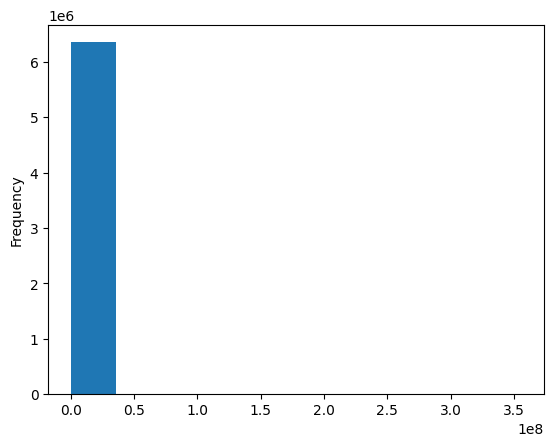

In [ ]:
df['oldbalanceDest'].plot(kind='hist')

In [ ]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [ ]:
df['isFraud'].value_counts()
#seems like imbalanced dataset

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='amount', ylabel='isFraud'>

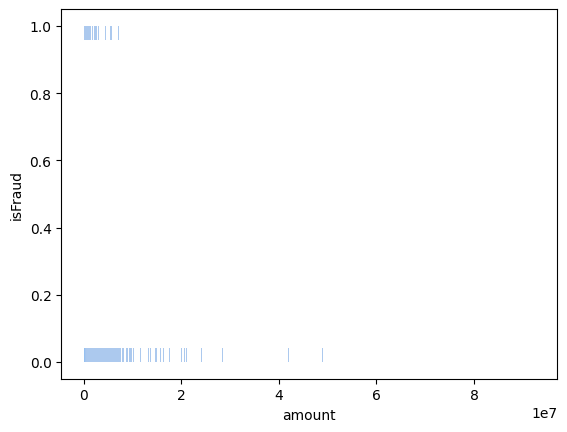

In [ ]:
sns.histplot(x='amount',y='isFraud',data=df)

<Axes: xlabel='type', ylabel='isFraud'>

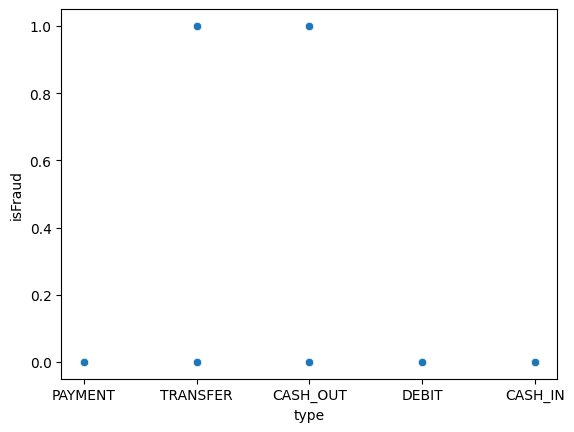

In [ ]:
sns.scatterplot(x='type',y='isFraud',data=df)
#fraudlent transactions occured when there are more cash out and transfer types

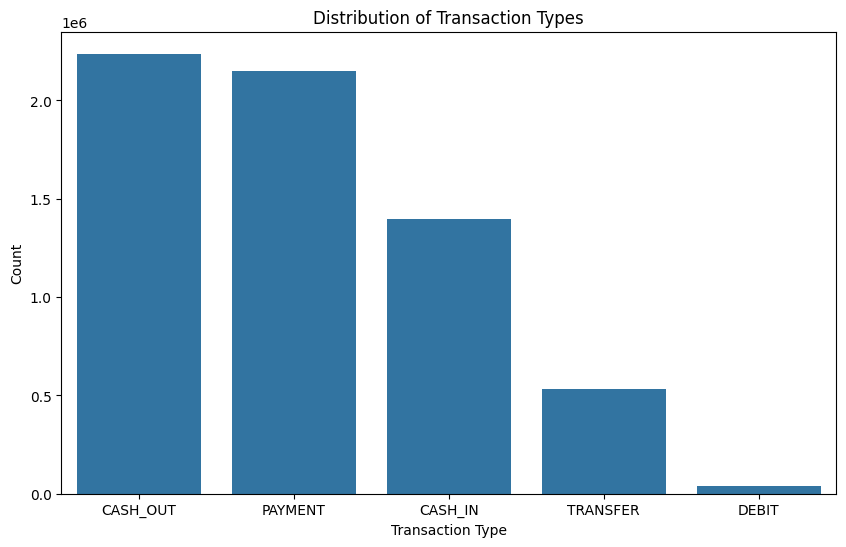

In [ ]:
transaction_counts = df['type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

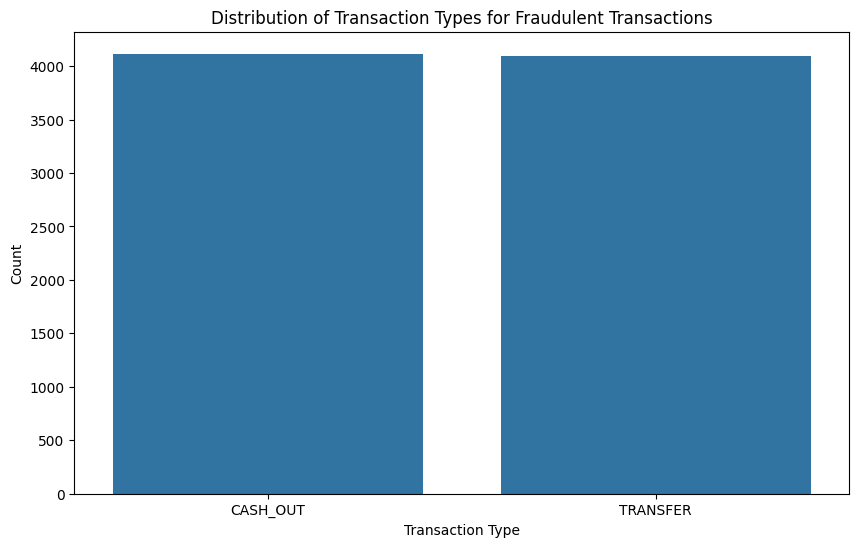

In [ ]:
fraud_counts = df[df['isFraud'] == 1]['type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Transaction Types for Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [ ]:
missing_oldbalanceDest = df['oldbalanceDest'].isnull() | (df['oldbalanceDest'] == 0)
missing_newbalanceDest = df['newbalanceDest'].isnull() | (df['newbalanceDest'] == 0)

print(f"Missing oldbalanceDest: {missing_oldbalanceDest.sum()}")
print(f"Missing newbalanceDest: {missing_newbalanceDest.sum()}")


Missing oldbalanceDest: 2704388
Missing newbalanceDest: 2439433


FEATURE ENGINEERING

In [ ]:
#transaction amount percentage
df['amount_percentage_orig'] = (df['amount'] / df['oldbalanceOrg'].replace(0, 1))
df['amount_percentage_dest'] = (df['amount'] / df['newbalanceDest'].replace(0, 1))


In [ ]:
df['balance_change_Dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']

In [ ]:
df['hour_of_day']= df['step']%24

In [ ]:
#one hot encoding
df=pd.get_dummies(df,columns=['type'])

In [ ]:
features = ['amount', 'amount_percentage_orig', 'balance_change_orig', 'hour_of_day'] + [col for col in df.columns if col.startswith('type_')]


In [ ]:
target='isFraud'

In [ ]:
X=df[features]
y=df[target]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.999986378776877
Confusion Matrix:
 [[1906337      14]
 [     12    2423]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.99      1.00      0.99      2435

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
#The scores are very consistent across all folds, which suggests that the model
#is performing similarly on different subsets of the data. This consistency reduces the likelihood of overfitting.

Cross-validation scores: [0.99995206 0.99998978 0.9999945  0.99999214 0.99999764]
Mean cross-validation score: 0.9999852262118436
